# Week 8-PSC-questions

## Q1: plot stress-strain curve

A dogbone sample is given below, the key paramters we will use are the gauage length $L$, gauge width $W_c$, sample thickness $T$. See the figure below:

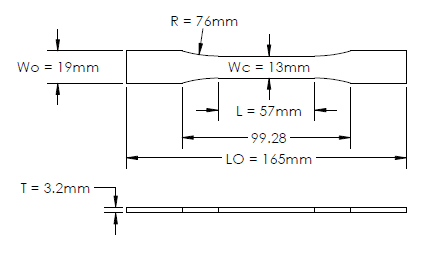

The data is given in a file called "data-Q1.csv", note that the column names are "Extension" and "Load". Now plot stress-strain curve and determine the ultimate tensile strength (the maximum strength). 

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### Your code ###



In [2]:
## Your code##


### Extra challenge: Design a program to determine the Young's Modulus and 0.2% offset Yield strength automatically? (do it after the IT lab session)

Hints: 

(1) Find the data range that covers the linear elastic part of the stress-strain curve, Pandas has this nice little method .between(). We can set lower and upper limits from the stress series and then use this to index out of both the stress and the strain series in the linear elastic region. For example: E_stress = stress[stress.between(a,b)], $a$ and $b$ is the lower and upper bound, which will be defined by you. 

(2) Then, you can use the scipy's linear regression function called **stats.linregress()** to calculate the slope in the linear elastic region. The slope will be the Young's moduls $E$.  

(3) Now to determine the 0.2% offset yield strength, we will add a 0.002 or 0.2 % offset line to our plot. We will create a new linear series using the general form:

$$ y = mx + b $$
$y$ will be the $\sigma$ value, $x$ will be the offset strain values ($\epsilon - 0.002$), $m$ (the slope) is the elastic modulus $E$, and $b$ is the y-intercept. Adapting $y = mx + b$ to our 0.002 off-set line looks like the equation below.

$$ \sigma_{offset} = E (\epsilon - 0.002) + 0 $$
We can code $\sigma_{offset}$ line into a new series based on the equation above. 

Now that the stress_offset series is defined, we can add our stress_offset line to the plot. When we call the plt.plot() command, we will pass in two x-y pairs. The first x-y pair is strain_Al, stress_Al, the second x-y pair is strain_Al, stress_offset.

Then you need to find the intersection point bewteen the original stress-strain curve and the elastic offset-line. We can use the a library "shapely" to find the intersection. 



In [3]:
# Install the shapely library
# Python has a specific module called Shapely for doing various geometric operations

!pip install shapely

from shapely.geometry import LineString

###  Make sure you finish the above part before moving to this one

In [4]:
# You will need to import the stress-strain curve in the previous box

# The code below will not work until you have defined all the variables!

# Find the offset stress-strain curve

Modulus= 1000 # MPa, Change this, this should be value you found from the slope of the elastic curve

offset = 0.2/100

sigma_offset = modulus*(strain - offset)


# Example code to use shapely library
# calculating the offset stress

line_1=LineString(np.column_stack((stress, strain))) # Original stress-strain curve
line_2=LineString(np.column_stack((sigma_offset, strain))) # Offset curve

intersection=line_1.intersection(line_2)

x,y =intersection.xy

print(x,y)

NameError: name 'modulus' is not defined